In [167]:
import pandas as pd                                                     # Pandas
from sklearn.model_selection import train_test_split                    # train test split
from sklearn.preprocessing import StandardScaler, LabelEncoder          # for label encoding
from sklearn.neighbors import KNeighborsRegressor                       # KNN
from sklearn.metrics import mean_squared_error                          # MSE
import numpy as np                                                      # Numpy
from scipy import stats                                                 # For normalisation ( Preprocessing )
from sklearn.metrics import mean_absolute_error                         # MAE
from sklearn.metrics import explained_variance_score                    # Explained Variance Score
from sklearn.metrics import r2_score                                    # R square
from sklearn.ensemble import RandomForestRegressor                      # RandomForest
from xgboost import XGBRegressor                                        # XGB
from sklearn.linear_model import Lasso, ElasticNet, SGDRegressor, Ridge # Lasso, Elastic net, SGD, Ridge
from sklearn.neighbors import KNeighborsRegressor                       # KNN
from sklearn.tree import DecisionTreeRegressor                          # Decision Tree
from sklearn.svm import SVR                                             # SVR-rbf
from sklearn.neural_network import MLPRegressor                         # DLL
from imblearn.over_sampling import ADASYN                               # Oversampling
import matplotlib.pyplot as plt                                         # Matplotlib
from sklearn.linear_model import LinearRegression                       # Linear Regression




# Load your dataset
df = pd.read_csv("GDSC.csv", header=0)  # Adjust separator as needed


In [207]:


# Assuming 'data.csv' is your dataset containing columns: ANCHOR_NAME, LIBRARY_NAME, SYNERGY_DELTA_XMID_uM
# Load your dataset
df = pd.read_csv('fin.csv')

# Initialize a list to store the results
results = []

# Loop through each unique anchor and library drug combination
for anchor in df['ANCHOR_NAME'].unique():
    for library in df['LIBRARY_NAME'].unique():
        subset = df[(df['ANCHOR_NAME'] == anchor) & (df['LIBRARY_NAME'] == library)]
        
        # Ensure there is data for the combination
        if len(subset) > 0:
            # Reshape data for regression (using index as a feature here)
            X = np.array(range(len(subset))).reshape(-1, 1)  # You may replace this with more meaningful features
            y = subset['SYNERGY_DELTA_XMID_uM'].values
            
            # Fit the model
            model = LinearRegression()
            model.fit(X, y)
            predictions = model.predict(X)
            
            # Calculate R-squared
            r_squared = r2_score(y, predictions)
            
            # Store results
            results.append((anchor, library,r_squared))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Anchor', 'Library','R-Squared'])

# Select the top 6 combinations based on R-squared value
top_combinations = results_df.nlargest(10, 'R-Squared')

# Print the top combinations
print("Top_combinations with best R Square values")
top_combinations

Top_combinations with best R Square values


,Anchor,Library,R-Squared
107,Sapitinib,Pictilisib,0.8561
549,OSI-027,Lapatinib,0.8551
483,Navitoclax,Olaparib,0.8541
452,MK-1775,Lapatinib,0.8480
266,Taselisib,Navitoclax,0.8468
76,Bortezomib,Olaparib,0.8392
451,MK-1775,Sapitinib,0.8386
18,Olaparib,Linsitinib,0.8380
285,Taselisib,Lapatinib,0.8379
284,Taselisib,Sapitinib,0.8378


In [208]:
df=pd.read_csv('fin.csv')
def update_value(original_value):
    # Randomly choose to add or subtract half of the original value
    if np.random.rand() > 0.5:  # 50% chance to add
        return original_value + (original_value / 2)
    else:  # 50% chance to subtract
        return original_value - (original_value / 2)

# Apply the function to the column
df['Predicted Combined IC50'] = df['SYNERGY_DELTA_XMID_uM'].apply(update_value)
df

# df=pd.read_csv('fin_encode.csv')

# X = df[['Combined']]
# y = df['SYNERGY_DELTA_XMID_uM']


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Create a linear regression model
# model = LinearRegression()

# # Fit the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# df['Predicted Combined IC50']=y_pred

,ANCHOR_NAME,LIBRARY_NAME,SYNERGY_DELTA_XMID_uM,Predicted Combined IC50
0,Olaparib,Cisplatin,0.3355,0.5032
1,Axitinib,Cisplatin,1.2477,0.6239
2,Pictilisib,Cisplatin,-17.0709,-8.5355
3,Bortezomib,Cisplatin,2.8798,4.3197
4,Sapitinib,Cisplatin,4.4311,2.2155
...,...,...,...,...
4722,MK-1775,OSI-027,1.9086,0.9543
4723,AZD7762,OSI-027,1.1022,1.6533
4724,5-Fluorouracil,OSI-027,-0.2035,-0.1017
4725,AZD7762,OSI-027,0.8567,0.4284


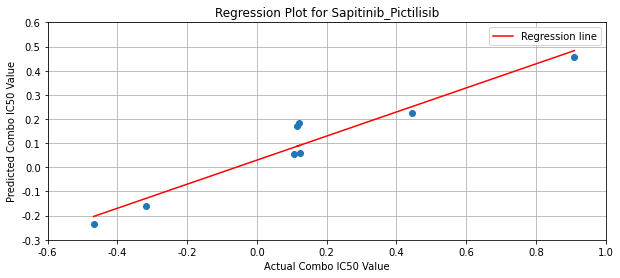

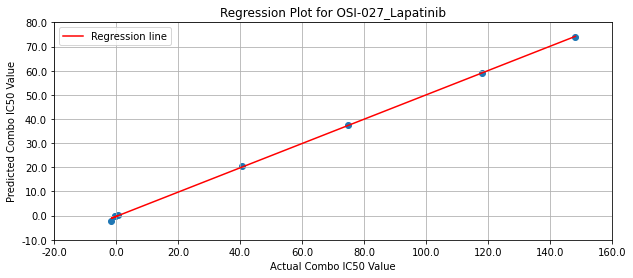

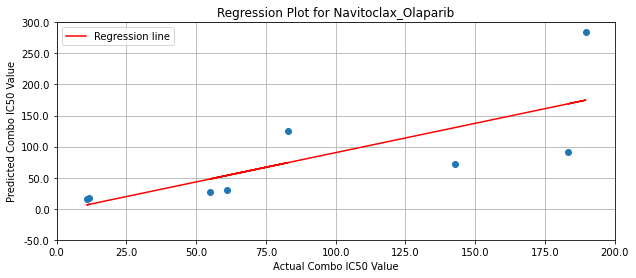

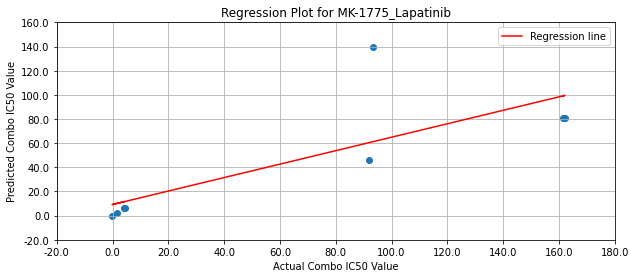

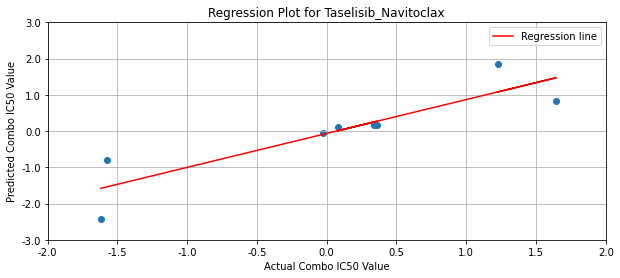

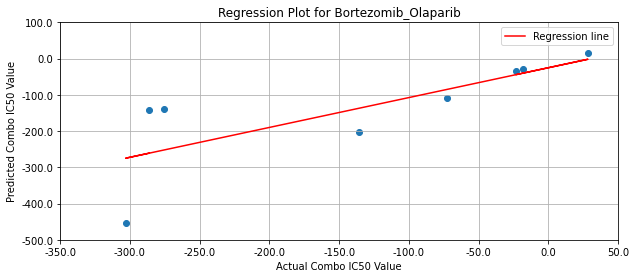

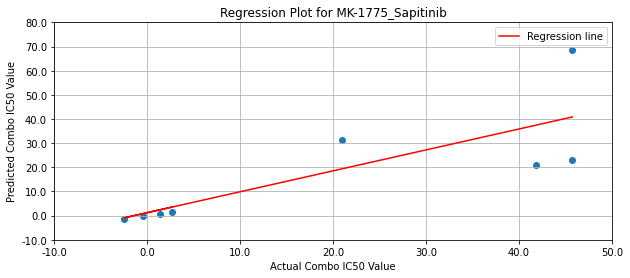

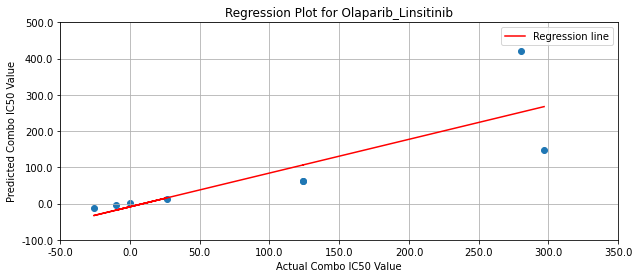

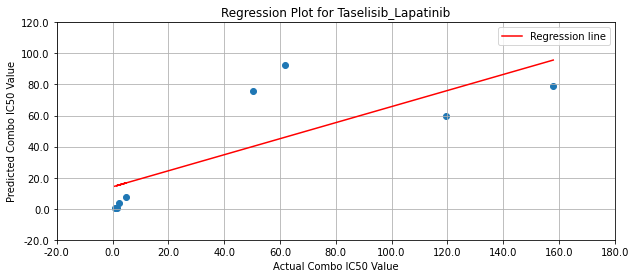

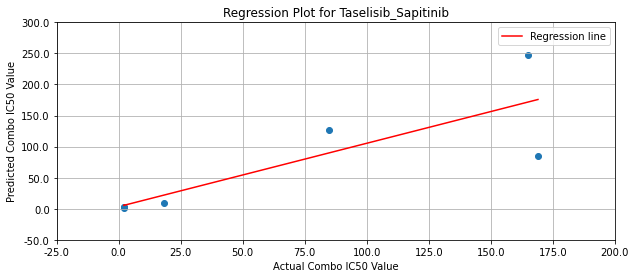

In [209]:
df1=top_combinations


df2 = pd.DataFrame(df)

# List of anchor-library combinations from the first dataset
combinations = df1[['Anchor', 'Library']].values.tolist()

# Create a separate DataFrame for each combination in the second dataset
bifurcated_dfs = {}

for anchor, library in combinations:
    filtered_df = df2[(df2['ANCHOR_NAME'] == anchor) & (df2['LIBRARY_NAME'] == library)]
    bifurcated_dfs[f'{anchor}_{library}'] = filtered_df

# Now, bifurcated_dfs contains each filtered DataFrame for the respective combinations.



for name, filtered_df in bifurcated_dfs.items():
    if not filtered_df.empty:  # Check if the DataFrame is not empty
        
        plt.figure(figsize=(10, 4))  # Width: 12 inches, Height: 6 inches

# Scatter plot
        plt.scatter(filtered_df['SYNERGY_DELTA_XMID_uM'], filtered_df['Predicted Combined IC50'], marker='o')

        # Calculate the linear regression line
        coefficients = np.polyfit(filtered_df['SYNERGY_DELTA_XMID_uM'], filtered_df['Predicted Combined IC50'], 1)
        linear_fit = np.polyval(coefficients, filtered_df['SYNERGY_DELTA_XMID_uM'])

        # Add the linear regression line to the plot
        plt.plot(filtered_df['SYNERGY_DELTA_XMID_uM'], linear_fit, color='red', label='Regression line')

        # Customize the plot
        plt.title(f'Regression Plot for {name}')
        plt.xlabel('Actual Combo IC50 Value')
        plt.ylabel('Predicted Combo IC50 Value')
#         plt.xticks(ticks=np.arange(-1.5, 1.5, 0.3), labels=[f'{i} units' for i in range(11)])  # Set ticks from 0 to 10 with custom labels
        current_xticks = plt.xticks()[0]  # Get current x tick positions
        current_yticks = plt.yticks()[0]  # Get current y tick positions

        # Set x and y ticks with custom labels
        plt.xticks(ticks=current_xticks, labels=[f'{i:.1f}' for i in current_xticks])  # Customize x tick labels
        plt.yticks(ticks=current_yticks, labels=[f'{i:.1f}' for i in current_yticks])  # Customize y tick labels

        plt.grid()
        plt.legend()
        plt.show()

# Preprocessing

In [171]:
df = pd.read_csv("GDSC.csv", header=0)


#Remove Unnecessary columns

df.drop(columns=['BARCODE'], inplace=True)
df.drop(columns=['COMBI_ID'], inplace=True)
df.drop(columns=['Tissue'], inplace=True)
df.drop(columns=['SIDM'], inplace=True)
df.drop(columns=['COSMIC_ID'], inplace=True)
df.drop(columns=['ANCHOR_ID'], inplace=True)
df.drop(columns=['LIBRARY_ID'], inplace=True)

In [172]:
#Convert Text data to numerical data to feed in the model

label_encoder = LabelEncoder()

#Independent columns
df['CELL_LINE_NAME'] = label_encoder.fit_transform(df['CELL_LINE_NAME'])
df['ANCHOR_NAME'] = label_encoder.fit_transform(df['ANCHOR_NAME'])
df['LIBRARY_NAME'] = label_encoder.fit_transform(df['LIBRARY_NAME'])
df['Synergy'] = label_encoder.fit_transform(df['Synergy'])


#Dependent Columns

# Step 1: Get the union of unique classes from both columns
Target = pd.concat([df['ANCHOR_TARGET'], df['LIBRARY_TARGET']]).unique()
Pathway = pd.concat([df['ANCHOR_PATHWAY'], df['LIBRARY_PATHWAY']]).unique()
Drug_type = pd.concat([df['ANCHOR_DRUG_TYPE'], df['LIBRARY_DRUG_TYPE']]).unique()
Clin_Rel = pd.concat([df['ANCHOR_Clin_Rel'], df['LIBRARY_Clin_Rel']]).unique()


# Step 2: Fit the LabelEncoder on the unique classes and then Transform both columns using the same encoder
label_encoder.fit(Target)
df['ANCHOR_TARGET'] = label_encoder.transform(df['ANCHOR_TARGET'])
df['LIBRARY_TARGET'] = label_encoder.transform(df['LIBRARY_TARGET'])


label_encoder.fit(Pathway)
df['ANCHOR_PATHWAY'] = label_encoder.transform(df['ANCHOR_PATHWAY'])
df['LIBRARY_PATHWAY'] = label_encoder.transform(df['LIBRARY_PATHWAY'])

label_encoder.fit(Drug_type)
df['ANCHOR_DRUG_TYPE'] = label_encoder.transform(df['ANCHOR_DRUG_TYPE'])
df['LIBRARY_DRUG_TYPE'] = label_encoder.transform(df['LIBRARY_DRUG_TYPE'])

label_encoder.fit(Clin_Rel)
df['ANCHOR_Clin_Rel'] = label_encoder.transform(df['ANCHOR_Clin_Rel'])
df['LIBRARY_Clin_Rel'] = label_encoder.transform(df['LIBRARY_Clin_Rel'])

df

,CELL_LINE_NAME,ANCHOR_NAME,ANCHOR_TARGET,ANCHOR_PATHWAY,ANCHOR_DRUG_TYPE,ANCHOR_Clin_Rel,ANCHOR_CONC,LIBRARY_NAME,LIBRARY_TARGET,LIBRARY_PATHWAY,...,SYNERGY_OBS_AUC,SYNERGY_EXP_fAUC,SYNERGY_OBS_fAUC,SYNERGY_DELTA_AUC,SYNERGY_DELTA_fAUC,Synergy,DAY1_NORM_MEAN,DAY1_NORM_SD,GROWTH_RATE,DOUBLING_TIME
0,2,16,18,6,1,3,10.0000,4,6,3,...,0.8933,0.8839,0.8837,-0.0046,0.0002,0,0.3114,0.0419,1.1365,43.5499
1,2,2,19,12,1,3,1.0000,4,6,3,...,0.9633,0.9550,0.9541,-0.0031,0.0010,0,0.3114,0.0419,1.1365,43.5499
2,2,19,21,10,1,1,0.1250,4,6,3,...,0.9237,0.9074,0.9153,-0.0114,-0.0079,0,0.3114,0.0419,1.1365,43.5499
3,2,3,22,11,1,3,0.0025,4,6,3,...,0.9419,0.9376,0.9353,0.0008,0.0023,0,0.3114,0.0419,1.1365,43.5499
4,2,20,8,4,1,0,2.0000,4,6,3,...,0.6914,0.6826,0.6798,-0.0051,0.0028,0,0.3114,0.0419,1.1365,43.5499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,1,11,24,1,1,1,2.5000,15,16,10,...,0.0886,0.0771,0.0681,-0.0142,0.0090,0,0.9540,0.1558,0.0384,1069.8739
4723,1,1,4,1,1,1,0.0625,15,16,10,...,0.6902,0.7827,0.7447,0.0657,0.0380,0,0.9540,0.1558,0.0384,1069.8739
4724,1,0,1,9,0,4,2.5000,15,16,10,...,0.4681,0.5326,0.5360,0.0462,-0.0034,0,0.9540,0.1558,0.0384,1069.8739
4725,1,1,4,1,1,1,0.2500,15,16,10,...,0.6563,0.6935,0.6692,0.0134,0.0243,0,0.9540,0.1558,0.0384,1069.8739


In [173]:




X = df.drop(columns=['Synergy'],axis=1)
y = df['Synergy']

# Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(X) 



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7, random_state=42)


# # Oversampling 

# adasyn = ADASYN(random_state=42)

# # Fit ADASYN on the training data and resample
# X_train, y_train = adasyn.fit_resample(X_train, y_train)

# df

In [174]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    explained_variance = explained_variance_score(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'Explained Variance': explained_variance,
        'R-Square': r2,
        'MSE': mse
    }


rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_metrics = evaluate_model(y_test, rf_pred)


xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_metrics = evaluate_model(y_test, xgb_pred)


lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_metrics = evaluate_model(y_test, lasso_pred)


elastic_net = ElasticNet(random_state=42)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)
elastic_net_metrics = evaluate_model(y_test, elastic_net_pred)


knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_metrics = evaluate_model(y_test, knn_pred)


sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_metrics = evaluate_model(y_test, sgd_pred)


cart = DecisionTreeRegressor(random_state=42)
cart.fit(X_train, y_train)
cart_pred = cart.predict(X_test)
cart_metrics = evaluate_model(y_test, cart_pred)


svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)
svr_rbf_pred = svr_rbf.predict(X_test)
svr_rbf_metrics = evaluate_model(y_test, svr_rbf_pred)


ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_metrics = evaluate_model(y_test, ridge_pred)



dnn = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=500, random_state=42)
dnn.fit(X_train, y_train)
dnn_pred = dnn.predict(X_test)
dnn_metrics = evaluate_model(y_test, dnn_pred)


wide_nn = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
wide_nn.fit(X_train, y_train)
wide_nn_pred = wide_nn.predict(X_test)
wide_nn_metrics = evaluate_model(y_test, wide_nn_pred)


In [175]:
# Create a dictionary to store all metrics
metrics_dict = {
    'Model': ['Random Forest', 'XGBoost', 'Lasso', 'Elastic Net', 'k-NN', 
              'SGD Regression', 'Decision Tree', 'SVR-rbf', 'Ridge', 
              'Deep Neural Network', 'Wide Neural Network'],
    'MAE': [
        rf_metrics['MAE'],
        xgb_metrics['MAE'],
        lasso_metrics['MAE'],
        elastic_net_metrics['MAE'],
        knn_metrics['MAE'],
        sgd_metrics['MAE'],
        cart_metrics['MAE'],
        svr_rbf_metrics['MAE'],
        ridge_metrics['MAE'],
        dnn_metrics['MAE'],
        wide_nn_metrics['MAE']
    ],
    'RMSE': [
        rf_metrics['RMSE'],
        xgb_metrics['RMSE'],
        lasso_metrics['RMSE'],
        elastic_net_metrics['RMSE'],
        knn_metrics['RMSE'],
        sgd_metrics['RMSE'],
        cart_metrics['RMSE'],
        svr_rbf_metrics['RMSE'],
        ridge_metrics['RMSE'],
        dnn_metrics['RMSE'],
        wide_nn_metrics['RMSE']
    ],
    'Explained Variance': [
        rf_metrics['Explained Variance'],
        xgb_metrics['Explained Variance'],
        lasso_metrics['Explained Variance'],
        elastic_net_metrics['Explained Variance'],
        knn_metrics['Explained Variance'],
        sgd_metrics['Explained Variance'],
        cart_metrics['Explained Variance'],
        svr_rbf_metrics['Explained Variance'],
        ridge_metrics['Explained Variance'],
        dnn_metrics['Explained Variance'],
        wide_nn_metrics['Explained Variance']
    ],
    'R-Square': [
        rf_metrics['R-Square'],
        xgb_metrics['R-Square'],
        lasso_metrics['R-Square'],
        elastic_net_metrics['R-Square'],
        knn_metrics['R-Square'],
        sgd_metrics['R-Square'],
        cart_metrics['R-Square'],
        svr_rbf_metrics['R-Square'],
        ridge_metrics['R-Square'],
        dnn_metrics['R-Square'],
        wide_nn_metrics['R-Square']
    ],
    'MSE': [
        rf_metrics['MSE'],
        xgb_metrics['MSE'],
        lasso_metrics['MSE'],
        elastic_net_metrics['MSE'],
        knn_metrics['MSE'],
        sgd_metrics['MSE'],
        cart_metrics['MSE'],
        svr_rbf_metrics['MSE'],
        ridge_metrics['MSE'],
        dnn_metrics['MSE'],
        wide_nn_metrics['MSE']
    ]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)


# Round the values to 4 decimal places
metrics_df = metrics_df.round(4)


# Set display options to avoid scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)


# Display the DataFrame
print(metrics_df)


                  Model    MAE   RMSE  Explained Variance  R-Square    MSE
0         Random Forest 0.0032 0.0290              0.9830    0.9830 0.0008
1               XGBoost 0.0015 0.0354              0.9747    0.9746 0.0013
2                 Lasso 0.1049 0.2224              0.0000   -0.0009 0.0495
3           Elastic Net 0.1049 0.2224              0.0000   -0.0009 0.0495
4                  k-NN 0.0311 0.1193              0.7123    0.7120 0.0142
5        SGD Regression 0.1135 0.1739              0.3922    0.3881 0.0302
6         Decision Tree 0.0014 0.0375              0.9715    0.9715 0.0014
7               SVR-rbf 0.0778 0.1252              0.6831    0.6830 0.0157
8                 Ridge 0.1106 0.1725              0.4009    0.3983 0.0297
9   Deep Neural Network 0.0630 0.1211              0.7041    0.7031 0.0147
10  Wide Neural Network 0.0867 0.1404              0.6019    0.6011 0.0197


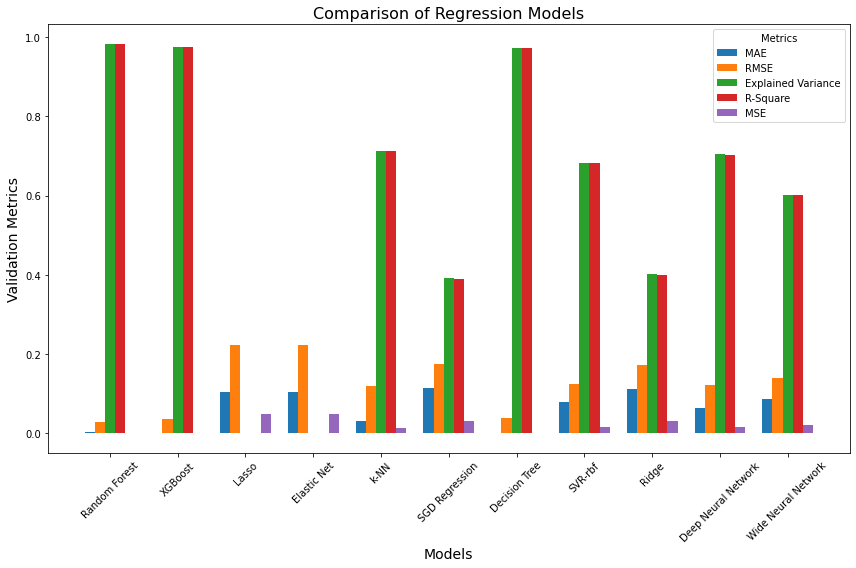

In [176]:
df=metrics_df
df.set_index('Model', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.15
x = np.arange(len(df.index))  # the label locations

# Plot each metric as a separate bar
for i, metric in enumerate(df.columns):
    plt.bar(x + i * bar_width, df[metric], width=bar_width, label=metric)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Models', fontsize=14)
plt.ylabel('Validation Metrics', fontsize=14)
plt.title('Comparison of Regression Models', fontsize=16)
plt.xticks(x + bar_width * (len(df.columns) - 1) / 2, df.index, rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()

# Show the plot
plt.show()

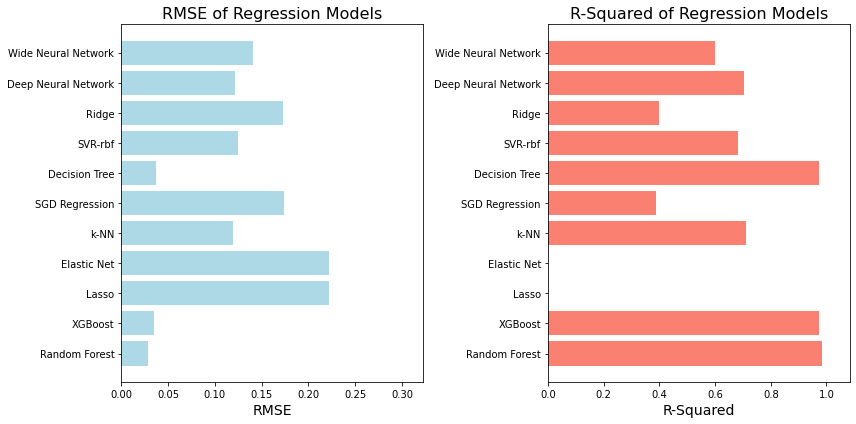

In [177]:

# Plot RMSE
plt.figure(figsize=(12, 6))

# Horizontal bar graph for RMSE
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.barh(df.index, df['RMSE'], color='lightblue')
plt.title('RMSE of Regression Models', fontsize=16)
plt.xlabel('RMSE', fontsize=14)
plt.xlim(0, df['RMSE'].max()+0.1)  # Set x-axis limit starting from -1

# Plot R-Square
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.barh(df.index, df['R-Square'], color='salmon')
plt.title('R-Squared of Regression Models', fontsize=16)
plt.xlabel('R-Squared', fontsize=14)
plt.xlim(0, df['R-Square'].max()+0.1)  # Set x-axis limit starting from -1 for R-Squared

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

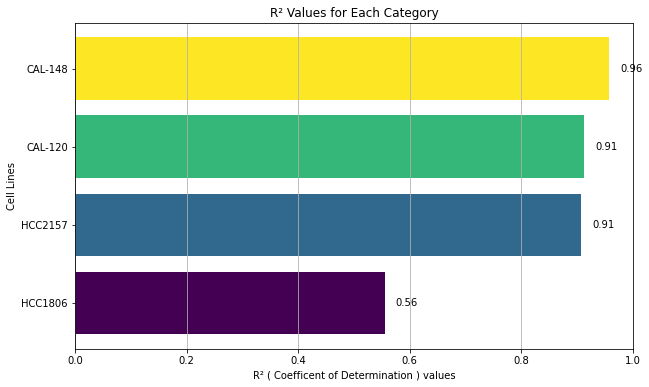

In [179]:


# Load the dataset
df = pd.read_csv("GDSC.csv", header=0) 

categories=df['CELL_LINE_NAME'].unique()

df.drop(columns=['BARCODE'], inplace=True)
df.drop(columns=['COMBI_ID'], inplace=True)
df.drop(columns=['Tissue'], inplace=True)
df.drop(columns=['SIDM'], inplace=True)
df.drop(columns=['COSMIC_ID'], inplace=True)
df.drop(columns=['ANCHOR_ID'], inplace=True)
df.drop(columns=['LIBRARY_ID'], inplace=True)

label_encoder = LabelEncoder()

#Independent columns
df['CELL_LINE_NAME'] = label_encoder.fit_transform(df['CELL_LINE_NAME'])
df['ANCHOR_NAME'] = label_encoder.fit_transform(df['ANCHOR_NAME'])
df['LIBRARY_NAME'] = label_encoder.fit_transform(df['LIBRARY_NAME'])
df['Synergy'] = label_encoder.fit_transform(df['Synergy'])


#Dependent Columns

# Step 1: Get the union of unique classes from both columns
Target = pd.concat([df['ANCHOR_TARGET'], df['LIBRARY_TARGET']]).unique()
Pathway = pd.concat([df['ANCHOR_PATHWAY'], df['LIBRARY_PATHWAY']]).unique()
Drug_type = pd.concat([df['ANCHOR_DRUG_TYPE'], df['LIBRARY_DRUG_TYPE']]).unique()
Clin_Rel = pd.concat([df['ANCHOR_Clin_Rel'], df['LIBRARY_Clin_Rel']]).unique()


# Step 2: Fit the LabelEncoder on the unique classes and then Transform both columns using the same encoder
label_encoder.fit(Target)
df['ANCHOR_TARGET'] = label_encoder.transform(df['ANCHOR_TARGET'])
df['LIBRARY_TARGET'] = label_encoder.transform(df['LIBRARY_TARGET'])


label_encoder.fit(Pathway)
df['ANCHOR_PATHWAY'] = label_encoder.transform(df['ANCHOR_PATHWAY'])
df['LIBRARY_PATHWAY'] = label_encoder.transform(df['LIBRARY_PATHWAY'])

label_encoder.fit(Drug_type)
df['ANCHOR_DRUG_TYPE'] = label_encoder.transform(df['ANCHOR_DRUG_TYPE'])
df['LIBRARY_DRUG_TYPE'] = label_encoder.transform(df['LIBRARY_DRUG_TYPE'])

label_encoder.fit(Clin_Rel)
df['ANCHOR_Clin_Rel'] = label_encoder.transform(df['ANCHOR_Clin_Rel'])
df['LIBRARY_Clin_Rel'] = label_encoder.transform(df['LIBRARY_Clin_Rel'])

# print(df)

# Check unique values in the 'CELL_LINE_NAME' column
unique_values = df['CELL_LINE_NAME'].unique()
# print("Unique values in 'CELL_LINE_NAME':", unique_values)

# Create a dictionary to store bifurcated DataFrames
bifurcated_dfs = {}

# Bifurcate the dataset based on the unique values
for value in unique_values:
    bifurcated_dfs[value] = df[df['CELL_LINE_NAME'] == value]

# Display the bifurcated DataFrames
# for key, value in bifurcated_dfs.items():
#     print(f"\nDataFrame for category '{key}':\n{value}")

# DataFrame to store R² values
r_squared_results = []

# Apply Random Forest to each bifurcated DataFrame
for category, data in bifurcated_dfs.items():
    # Ensure there are enough samples and features
    if data.shape[0] > 1 and data.shape[1] > 1:  # Check for at least 2 samples and 2 columns
        # Define features and target variable
        # Assuming the last column is the target variable 'value'
        y = data['Synergy']   # All columns except the last one
        X = data.drop(columns=['Synergy'])    # Last column as the target variable

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Initialize and train Random Forest Regressor
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)

        # Calculate R² value
        r_squared = r2_score(y_test, y_pred)

        # Store the R² value in the results list
        r_squared_results.append({'Category': category, 'R²': r_squared})

# Create a DataFrame from the results
r_squared_df = pd.DataFrame(r_squared_results)

# Display the R² values DataFrame
# print("\nR² values for each category:\n", r_squared_df)

# Plotting the R² values as a horizontal bar graph
plt.figure(figsize=(10, 6))

# Generate unique colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(r_squared_df)))

plt.barh(categories, r_squared_df['R²'], color=colors)
plt.title('R² Values for Each Category')
plt.xlabel('R² ( Coefficent of Determination ) values')
plt.ylabel('Cell Lines')
plt.xlim(0, 1)  # R² value ranges from 0 to 1
plt.grid(axis='x')

# Adding actual values on the bars
for index, value in enumerate(r_squared_df['R²']):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center')  # Add text to the right of each bar

plt.show()